## Задача №1

In [1]:
import pandas as pd 
import numpy as np
import scipy.stats as sts

import matplotlib.pyplot as plt
import seaborn as sns

from collections import defaultdict

*а) График функции правдоподобия как функции от общего количества такси n; оценка числа n методом максимального правдоподобия*

Заметим, что функция правдоподобия в данном случае будет выглядеть следующим образом: $\prod \frac{y - i}{y}$, где $i \in {0, ..., 9}$

In [4]:
def L(y, f): #функция правдоподобия от количества такси y и первого повтора таксиста f
    p = 1
    for i in range(1, f):
        p *= (y - i) / y
    p = (f / y) * p
    return p

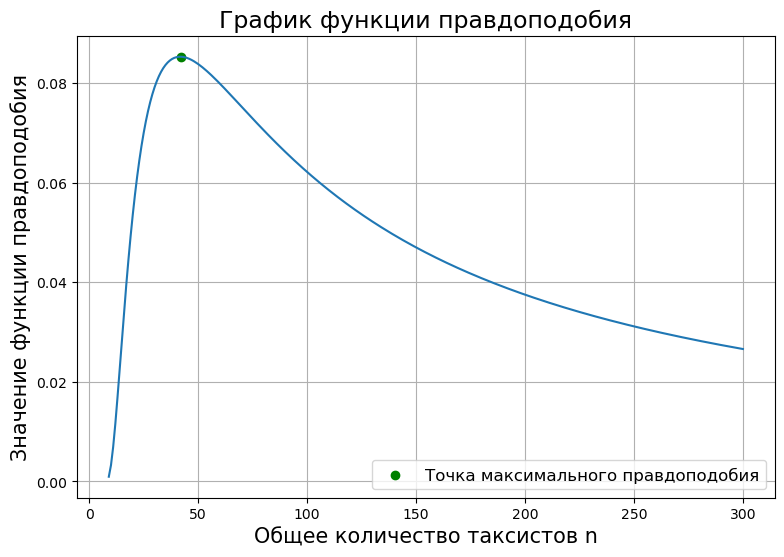

Оценка n методом максимального правдоподобия: n = 42


In [5]:
p_values = []
for i in range(9, 301):
    p_values.append(L(i, 9))

plt.figure(figsize = (9, 6))
x = np.arange(9, 301) #n можно выбрать какими-угодно, хоть до 500, вид графика не изменится
plt.plot(x, p_values) 
plt.scatter(p_values.index(max(p_values)) + 9, max(p_values), c = 'green', label = 'Точка максимального правдоподобия')

plt.title('График функции правдоподобия', fontsize=17)

plt.xlabel('Общее количество таксистов n', fontsize=15)
plt.ylabel('Значение функции правдоподобия', fontsize=15)

plt.legend(fontsize=12, loc='lower right')

plt.grid()
plt.show()

print(f'Оценка n методом максимального правдоподобия: n = {p_values.index(max(p_values)) + 9}')

*б) График математического ожидания номера заказа, на котором происходит первый повторный приезд, как функции от общего количества такси n; оценка числа n методом моментов*

Заметим, что в данном случае формула математического ожидания для количества такси n будет выглядеть слкдующим образом: $\sum i \cdot \prod \frac{n - j}{n} \cdot \frac{i - 1}{n}$, где $i \in {2, ..., n + 1}, j \in {1, i}$

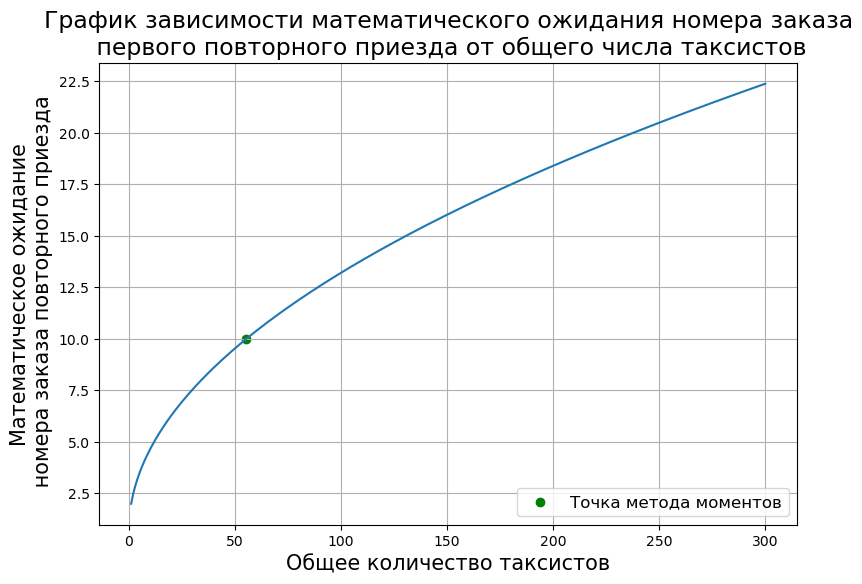

Оценка n методом моментов: n = 55


In [19]:
def repeat(n):
    me = 0 #мат. ожидание
    for i in range(2, n + 2): #повтор таксиста может произойти на любой из 2-ой до n+1-ой поездки
        not_happend_yet = 1
        for j in range(1, i - 1):
            not_happend_yet *= (n - j) / n #вероятность того, что на любой из i-1-ой поездки не произошел повтор
        me += i * not_happend_yet * ((i - 1) / n) #перемножаем номер поездки, вероятность того, что до этой поездки не было повторов, и вероятность того, что на данной поездке произошел повтор (т.е. (i - 1) / n - равновероятно приехал любой из i - 1 ранее посещенных нами таксистов)
    return me


mes = []
for i in range(1, 301):
    mes.append(repeat(i))
    
mms = []
for i in range(300):
    mms.append((mes[i] - 10) ** 2) #считаем квадарты отклонения от реального значения первого повторного приезда (используем 2ой момент)

plt.figure(figsize = (9, 6))
x = np.arange(1, 301) #n можно выбрать какими-угодно, хоть до 500, вид графика не изменится
plt.plot(x, mes)
plt.scatter(mms.index(min(mms)) + 1, mes[mms.index(min(mms))], c = 'green', label = 'Точка метода моментов')

plt.title('График зависимости математического ожидания номера заказа\n первого повторного приезда от общего числа таксистов', fontsize=17)

plt.xlabel('Общее количество таксистов', fontsize=15)
plt.ylabel('Математическое ожидание\n номера заказа повторного приезда', fontsize=15)

plt.legend(fontsize=12, loc='lower right')

plt.grid()
plt.show()


print(f'Оценка n методом моментов: n = {mms.index(min(mms)) + 1}') #находим n для которого квадрат отклонения мимнимален

*в) Гистограммы для оценок двух методов; оценка смещения, дисперсии и среднеквадратичной ошибки двух методов*

[Text(0, 0.5, 'Количество в выборке'),
 Text(0.5, 0, 'Оценка количества таксистов')]

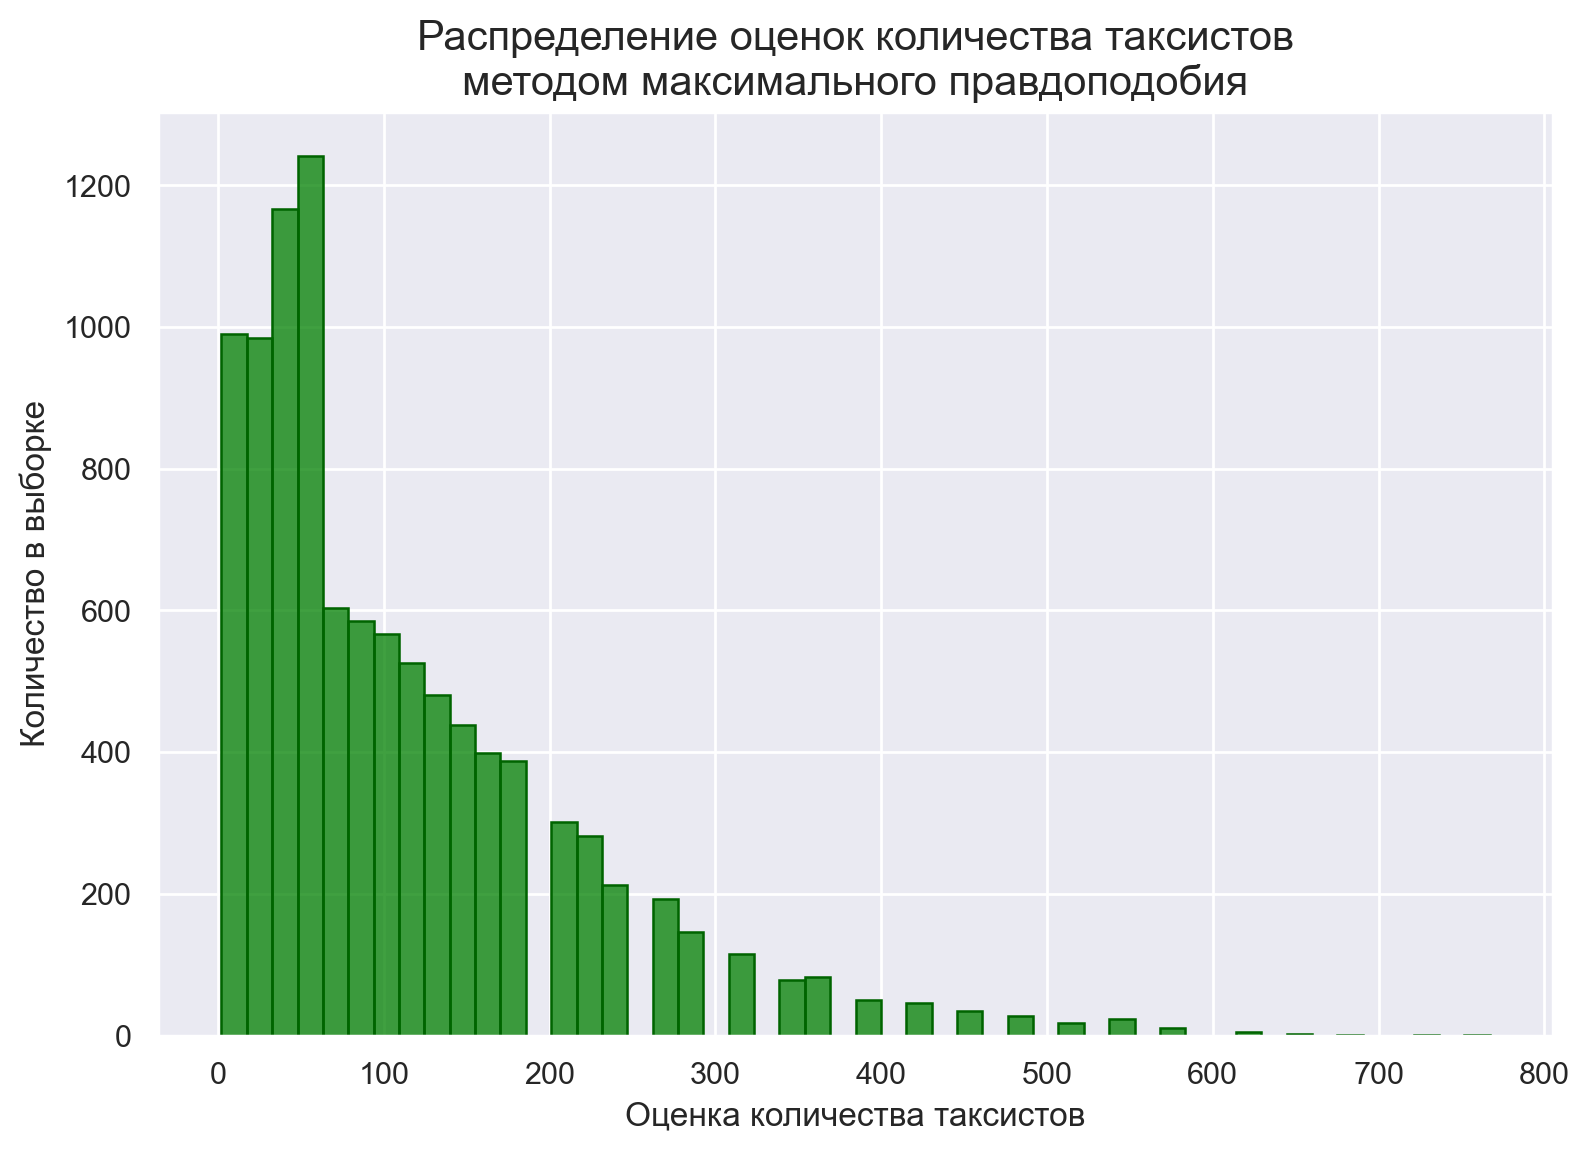

In [23]:
np.random.seed(42)
def simulation():
    td = np.random.randint(100)
    were = []
    while (td not in were):
        were.append(td)
        td = np.random.randint(100)
    first_same = len(were) + 1
    
    #счситаем ml
    p_values = []
    for i in range(first_same - 1, first_same * 30): #можно брать и больший разброс, я решил сохранить его, как и в случае (9, 300)
        p_values.append(L(i, first_same))
    ml = p_values.index(max(p_values)) + first_same - 1
    
    #считаем mm
    mms = []
    for i in range(300): #можно брать и больший разброс, я решил сохранить его, как и в пункте б)
        mms.append((mes[i] - first_same) ** 2)
    mm = mms.index(min(mms)) + 1
    
    return (ml, mm)

ML = []
MM = []
for i in range(10000):
    result = simulation()
    ML.append(result[0])
    MM.append(result[1])

    
%config InlineBackend.figure_format = 'retina'

sns.set(style='darkgrid', palette='deep')

plt.rcParams['figure.figsize'] = 8, 5
plt.rcParams['font.size'] = 12
plt.rcParams['savefig.format'] = 'pdf'

fig, ax = plt.subplots(figsize=(9, 6))
ax.set_title('Распределение оценок количества таксистов\nметодом максимального правдоподобия', fontsize=15)
sns.histplot(ML,
             bins=50,
             ax=ax, 
             color='green',
             edgecolor='darkgreen');
ax.set (ylabel='Количество в выборке', xlabel='Оценка количества таксистов')

[Text(0, 0.5, 'Количество в выборке'),
 Text(0.5, 0, 'Оценка количества таксистов')]

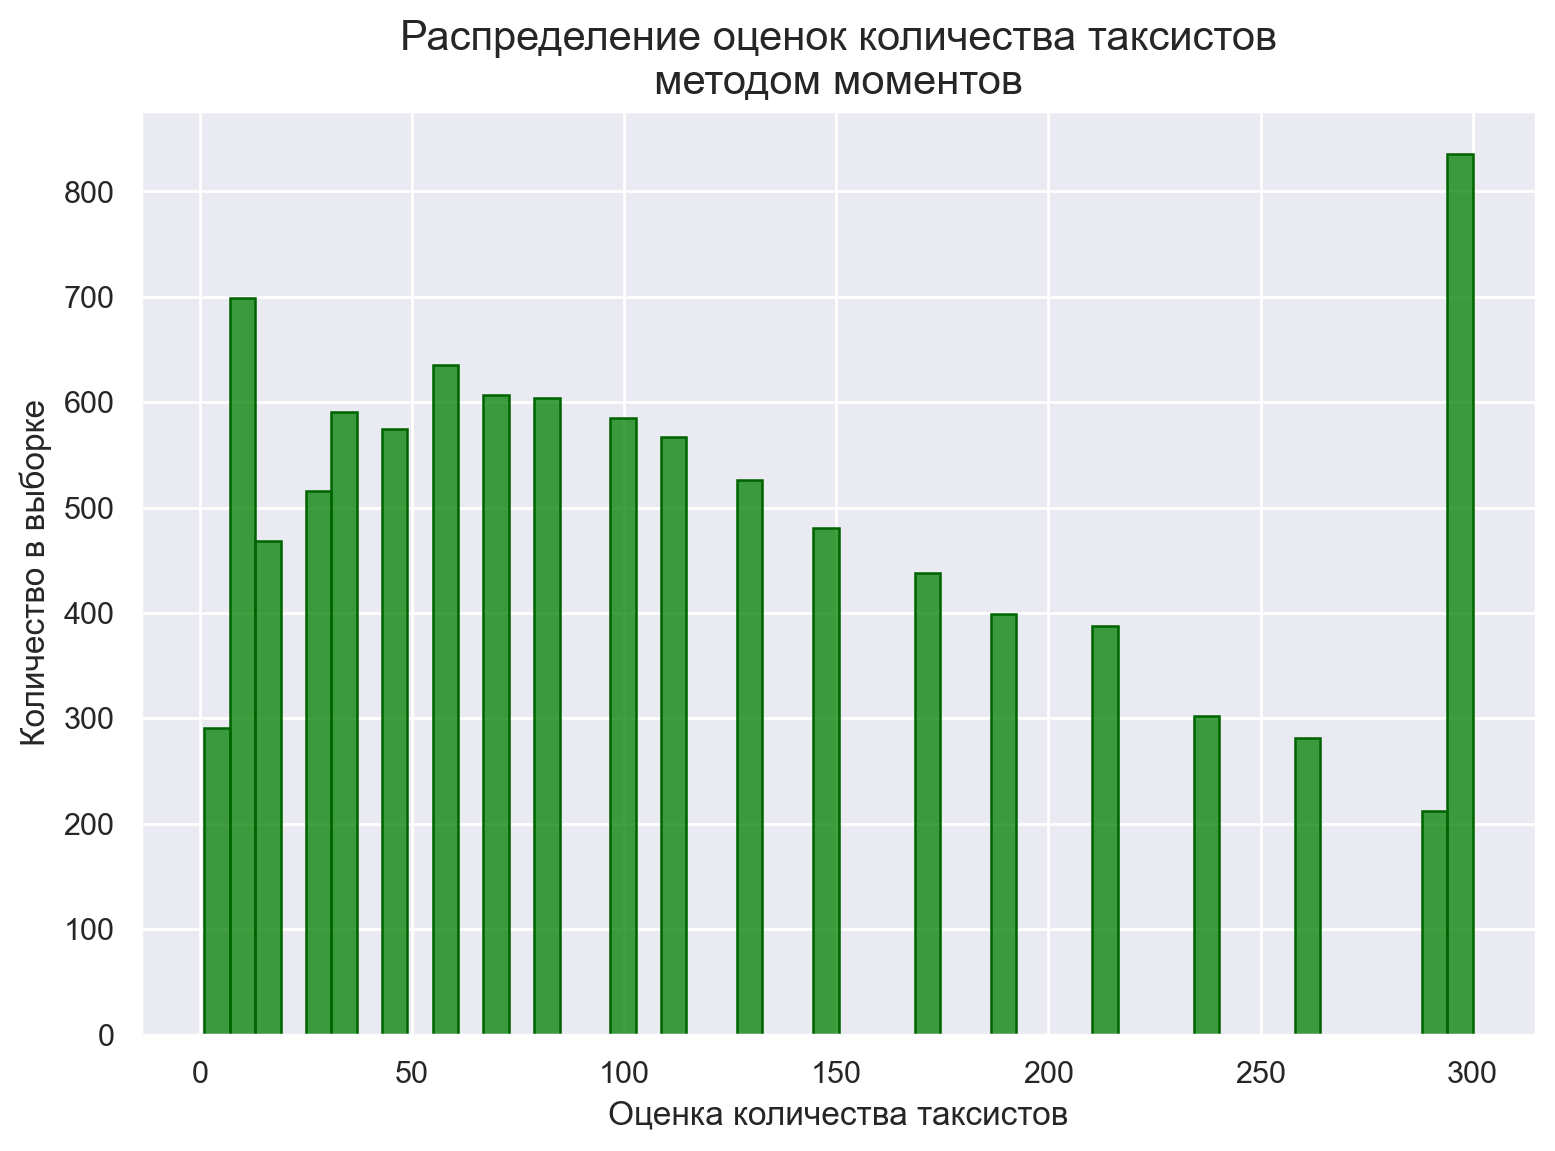

In [26]:
plt.rcParams['figure.figsize'] = 8, 5
plt.rcParams['font.size'] = 12
plt.rcParams['savefig.format'] = 'pdf'

fig, ax = plt.subplots(figsize=(9, 6))
ax.set_title('Распределение оценок количества таксистов\nметодом моментов', fontsize=15)
sns.histplot(MM,
             bins=50,
             ax=ax, 
             color='green',
             edgecolor='darkgreen');
ax.set (ylabel='Количество в выборке', xlabel='Оценка количества таксистов')

In [27]:
ML = np.array(ML)
MM = np.array(MM)

Для метода максимального правдоподобия мы получили следующие данные:

In [28]:
print(f'Смещение: {np.mean(ML) - 100}')
print(f'Дисперсия: {np.var(ML)}')
print(f'MSE: {(np.mean(ML) - 100) ** 2}')

Смещение: 8.764700000000005
Дисперсия: 9675.23853391
MSE: 76.81996609000008


Для метода моментов мы получили следующие данные:

In [30]:
print(f'Смещение: {np.mean(MM) - 100}')
print(f'Дисперсия: {np.var(MM)}')
print(f'MSE: {(np.mean(MM) - 100) ** 2}')

Смещение: 15.326800000000006
Дисперсия: 8522.77140176
MSE: 234.9107982400002


## Задача №4

In [10]:
df = pd.read_csv('Exam_stat - Exam.csv', sep = ',')
df = df[['Last name', 'Баллы']]
df = df.drop (index=[0, 1, 2, 3, 4])
df.head()

,Last name,Баллы
5,Репенкова,16.0
6,Ролдугина,0.0
7,Сафина,19.0
8,Сидоров,26.0
9,Солоухин,21.0


In [11]:
glasn = df[df['Last name'].str[0].isin(['А','Е','И','О','У','Ё','Ю','Я'])]
soglasn = df[df['Last name'].str[0].isin(['Б', 'В', 'Г', 'Д', 'Ж', 'З', 'Й', 'К', 'Л', 'М', 'Н', 'П', 'Р', 'С', 'Т', 'Ф', 'Х', 'Ц', 'Ч', 'Ш', 'Щ'])]
glasn.head()

,Last name,Баллы
22,Адилхан,25.0
23,Алексанян,26.0
37,Охотин,25.0
50,Аврамчук,29.0
51,Авсеенко,26.0


Гипотезы:
- $H_0$: ожидаемые результаты экзамена по теории вероятностей тех, у кого фамилия начинается с гласной буквы и с согласной буквы, равны
- $H_1$: ожидаемые результаты экзамена по теории вероятностей тех, у кого фамилия начинается с гласной буквы и с согласной буквы, не равны

*а) Тест Уэлча*

In [25]:
from scipy.stats import ttest_ind

res = ttest_ind(glasn['Баллы'], soglasn['Баллы'])
p_value = res[1]

print(f'Получившееся p-value: {p_value}')
if (p_value < 0.05):
    print(f'Нулевая гипотеза отергается')
else:
    print(f'Нулевая гипотеза не отвергается')

Получившееся p-value: 0.37836941110296285
Нулевая гипотеза не отвергается


*б) Наивный бутстрэп*

In [16]:
np.random.seed(42)
for i in range(5):
    print(np.random.choice(5))

3
4
2
4
4


In [28]:
df_diff = np.abs(glasn['Баллы'].mean() - soglasn['Баллы'].mean())

def simple_bootstrap(n):
    p_value = 0
    for i in range(n):
        np.random.seed(i)
        new_glasn = np.random.choice(glasn['Баллы'], size = glasn['Баллы'].size)
        new_soglasn = np.random.choice(soglasn['Баллы'], size = soglasn['Баллы'].size)
        diff = np.abs(new_glasn.mean() - new_soglasn.mean())
        p_value += int(diff >= df_diff)
    p_value /= n
    return p_value

p_value = simple_bootstrap(5000)
    

In [29]:
print(f'Получившееся p-value: {p_value}')
if (p_value < 0.05):
    print(f'Нулевая гипотеза отергается')
else:
    print(f'Нулевая гипотеза не отвергается')

Получившееся p-value: 0.5386
Нулевая гипотеза не отвергается


In [32]:
from scipy.stats import bootstrap

res = bootstrap((glasn['Баллы'], ), np.mean)
res 

BootstrapResult(confidence_interval=ConfidenceInterval(low=12.835697371181174, high=17.4375), standard_error=1.184918600210251)

*в) Бутстрэп t-статистики*

In [54]:
df_ttest = ttest_ind(glasn['Баллы'], soglasn['Баллы'])[0]

def simple_bootstrap(n):
    p_value = 0
    for i in range(n):
        np.random.seed(i)
        new_glasn = np.random.choice(glasn['Баллы'], size = glasn['Баллы'].size)
        new_soglasn = np.random.choice(soglasn['Баллы'], size = soglasn['Баллы'].size)
        ttest = ttest_ind(new_glasn, new_soglasn)[0]
        p_value += int(ttest >= df_ttest)
    p_value /= n
    return p_value

p_value = simple_bootstrap(5000)
    

In [55]:
print(f'Получившееся p-value: {p_value}')
if (p_value < 0.05):
    print(f'Нулевая гипотеза отергается')
else:
    print(f'Нулевая гипотеза не отвергается')

Получившееся p-value: 0.5038
Нулевая гипотеза не отвергается


*г) Перестановочный тест*

In [43]:
def statistics(x, y):
    return np.mean(x) - np.mean(y)

In [45]:
from scipy.stats import permutation_test

res = permutation_test((glasn['Баллы'], soglasn['Баллы']), statistics)
res

PermutationTestResult(statistic=-1.09312426383981, pvalue=0.3754, null_distribution=array([ 0.29578916,  0.12522085, -1.87286514, ...,  0.00338634,
       -0.75198763,  1.7334364 ]))

In [47]:
print(f'Получившееся p-value: {res.pvalue}')
if (p_value < 0.05):
    print(f'Нулевая гипотеза отергается')
else:
    print(f'Нулевая гипотеза не отвергается')

Получившееся p-value: 0.3754
Нулевая гипотеза не отвергается


## Задача №7

In [56]:
dialog = pd.read_json("dialog.json")
dialog

,conversation_id,messages
0,930e631c-1520-484f-82da-ecb1749df5b7,"{'id': 'c81ce63f-1fd5-47b8-adb8-762a1eb68482',..."
1,930e631c-1520-484f-82da-ecb1749df5b7,"{'id': '3a600372-0e24-4878-82fb-56db6d88f304',..."
2,930e631c-1520-484f-82da-ecb1749df5b7,"{'id': 'd674f6fa-5843-4105-ba87-59faa274f6df',..."
3,930e631c-1520-484f-82da-ecb1749df5b7,"{'id': '3c8584eb-2453-4088-9d31-de20070e30c5',..."
4,930e631c-1520-484f-82da-ecb1749df5b7,"{'id': 'acc69a3e-f8f4-4389-bc06-21249d541c77',..."
5,930e631c-1520-484f-82da-ecb1749df5b7,"{'id': '1c31505b-9038-421c-b0b2-f7a2fc8e28d3',..."
6,930e631c-1520-484f-82da-ecb1749df5b7,"{'id': '6d5cd007-3801-4fd7-81fa-b8a86f3fd1ae',..."
7,930e631c-1520-484f-82da-ecb1749df5b7,"{'id': '1ac2b01b-03c0-4a5f-b6b5-ce42fba60313',..."


In [74]:
for index, row in dialog.iterrows():
    print('ПИШЕТ', row['messages']['from'], ':', row['messages']['text'])
    print('------------------------------------------------------------------------------------------------------------------')

ПИШЕТ human : Вы играете в следующую игру. Кубик подкидывается неограниченное число раз. Если на
кубике выпадает 1, 2 или 3, то соответствующее количество монет добавляется на кон. Если
выпадает 4 или 5, то игра оканчивается и Вы получаете сумму, лежащую на кону. Если
выпадает 6, то игра оканчивается, а Вы не получаете ничего. Изначально на кону лежит
ноль рублей.
а) Какова вероятность того, что игра рано или поздно закончится выпадением 6-ки?
------------------------------------------------------------------------------------------------------------------
ПИШЕТ chat-gpt : Вероятность выпадения 6-ки на одном броске кубика составляет 1/6. Следовательно, вероятность того, что игра не закончится выпадением 6-ки на n бросках, равна (5/6)^n. Тогда вероятность того, что игра рано или поздно закончится выпадением 6-ки, равна 1 минус вероятность того, что игра не закончится выпадением 6-ки, то есть:

P(игра закончится выпадением 6-ки) = 1 - (5/6)^n

При этом n может быть любым неотрицательным 

## Задача №8

В течение курса мне были полезны следующие источники:
- Консультации перед минимумами контрольных работ, в особенности от следующего канала и автора(https://youtube.com/playlist?list=PLxwZ0BCM0StDMz9BWp3sWZWpAbBwUZ9CX) - помог быстро повторить теорию и качественно разобраться в ранее непонятых мною моментах, спасибо!
- Также помог разобраться в некоторых теоретических моментах курс "Введение в математическую статистику" от «Computer Science клуба» (https://compsciclub.ru/courses/2021-autumn/6.1008-matstatisticsintro/about?utm_campaign=career_page&utm_content=analytics&utm_medium=social&utm_source=changellenge) - в особенности понравились их частные примеры к чему-либо)